<a href="https://colab.research.google.com/github/rodrigohodgson/COVID-19/blob/master/Modelo_previsao_leitos_COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Ciência e Visualização de Dados em Saúde 2020.1
Profª Paula Dornhofer Paro Costa

Prof. André Santanché

##Equipe
Carlos André Nunes   RA 154964

Rodrigo Hodgson    RA 911134

##Descrição resumida do projeto

O objetivo deste projeto é realizar uma análise exploratória, avaliando as diferentes fontes de informação disponíveis sobre a evolução da COVID-19 e seus impactos no sistema de saúde, e propor um modelo preditivo com as informações mais confiáveis para estimar a evolução futura da doença. 

É notório que os dados oficiais da epidemia apresentam um alto grau de subnotificação, seja em relação ao número de casos quanto ao de óbitos. Durante a análise exploratória conseguimos acesso irrestrito à base de dados pública das notificações de Síndrome Respiratória Aguda Grave (SRAG), com dados detalhados de cada paciente atendido em 2020 até o dia 16 de junho. A partir dessa base, conseguimos estimar um número mais realista da quantidade de óbitos e também conseguimos avaliar a dinâmica de ocupação de leitos de enfermaria e de UTI. Outras informações que utilizamos para enriquecer e validar o modelo foram dados secundários obtidos de outras pesquisas e o resultado de um teste sorológico de prevalência da doença realizado no mês de maio.

O modelo construído para predição baseia-se no modelo SIR, com derivações paralelas dos casos de infectados entre não hospitalizados, internados em enfermaria e internados em UTI. Para validação da simulação do modelo foram utilizados os dados do município de São Paulo entre os dias 1º de abril e 30 de maio. A evolução diária do número de leitos e óbitos ocorreu de modo similar ao da base SRAG utilizada. Em termos de predição após o período avaliado, o modelo permanece com um bom grau de precisão se comparado ao teste de soropositividade realizado em meados de junho e à evolução do número de óbitos durante o mês de junho.

##Introdução e Motivação
O entendimento da evolução de uma nova doença é sempre um desafio para os epidemiologistas. No caso da COVID-19, esse desafio é ainda maior pelas restrições de acesso a informações confiáveis e em tempo real. Em uma fase da doença, em que não há tratamento efetivo ou vacinação disponível, a forma mais efetiva de controle da sua propagação é o distanciamento social. A avaliação da efetividade desse distanciamento social pelo número de novos casos diários é extremamente frágil, pela grande proporção de infectados com casos leves da doença e que nunca serão testados. Por outro lado, o número de leitos ocupados por SRAG e os óbitos relacionados são os números mais confiáveis para esse controle até o momento.

A proposta de construção de um modelo preditivo baseado na dinâmica de hospitalização tenta suportar a adoção das medidas não sanitárias em vigor, bem como possivelmente avaliar o impacto de novos tratamentos que venham a reduzir os tempos de internação e a letalidade da doença.

Nas seções seguintes serão detalhadas a análise exploratória em busca de dados confiáveis para a construção do modelo, bem como os detalhes de construção do modelo e os resultados obtidos.

###Pergunta de pesquisa
A pergunta de pesquisa originalmente formulada era: "Qual a demanda por leitos para tratamento da COVID-19 em um determinado município na próxima semana?".

Após avaliarmos os diferentes graus de confiabilidade dos dados disponíveis para os diferentes municípios do país e a complexidade de situações reais de pacientes atendidos em municípios diferentes de seu domicílio, optamos por restringir a pergunta de pesquisa ao município de São Paulo. Essa escolha se deveu principalmente à qualidade e à grande quantidade de informações disponíveis, bem como pelo fato desse município ter sido um dos primeiros a enfrentar os períodos de crescimento e estabilização da doença.

Dessa forma, a pergunta de pesquisa atualizada é: "Qual a demanda futura por leitos para tratamento da COVID-19 para o município de São Paulo?".

###Objetivos do projeto
Os principais objetivos do projeto foram:
*   Utilizar a ciência dos dados para entendimento de um problema real de predição na área da saúde
*   Entender as dificuldades, complexidades e limitações para o tratamento de problemas com bases de dados incompletas ou conflitantes 
*   Gerar um produto útil para suporte na tomada de decisões da área de saúde pública, considerando as limitações e condições aplicáveis ao uso de modelos preditivos


##Recursos e métodos
###Bases de dados
As bases de dados empregadas na análise são públicas e irrestritas, sendo divulgadas na presente data pelo Ministério da Saúde.

Base 1	https://covid.saude.gov.br/	- Divulgação diária dos casos e óbitos oficiais de COVID-19 no Brasil

Base 2	https://opendatasus.saude.gov.br/dataset/bd-srag-2020	- Divulgação semanal do Banco de Dados de Síndrome Respiratória Aguda Grave. A cópia disponível no repositório deste projeto refere-se à tabela de 16/06/2020.
###Ferramentas
A ferramenta empregada para análise estatística e visualização dos dados nas diferentes etapas do KDD foi o Orange.

Ferramenta 1	https://orange.biolab.si/	- Essa ferramenta open source possui instalação livre e gratuita.

Ferramenta 2 - Microsoft Excel

##Metodologia
Utilizamos a metodologia KDD para a seleção, pré-processamento, transformação, construção do modelo e avaliação dos resultados.

Os dados foram tipicamente pré-processados, transformados e interpretados em planilhas Excel, visualizados por meio de tabelas dinâmicas e gráficos, e no software Orange. O modelo de predição foi construído em python neste próprio notebook e também em versão idêntica baseada em uma planilha Excel.






###Detalhamento do Projeto
A primeira etapa do projeto tratou da busca por uma ou mais bases de dados que pudessem ter um grau satisfatório de confiabilidade para obtenção das características gerais da COVID-19, bem como das características da doença considerando os casos leves, que não precisam de internação, e dos casos graves, que demandam internação em enfermaria ou em UTI.

A primeira referência pesquisada foi obviamente a base oficial do Ministério da Saúde para registro diário de casos e óbitos atribuídos à COVID-19. Em teoria, essa base consolida as informações de casos e óbitos confirmados para a COVID-19 das secretarias de saúde de todas as unidades federativas do país. As informações dessa base estão em um nível agregado por UF e apresenta dados históricos desde o aparecimento da doença no país.

A base do Banco de Dados de SRAG 2020 começou a ser disponibilizada publicamente nas últimas semanas e apresenta individualmente todos os casos notificados de síndrome respiratória aguda grave, que incluem os casos classificados como influenza, COVID-19, outros vírus respiratórios, outros agentes etiológicos e ainda classificados como não especificados ou sem preenchimento.

Comparando as totalizações de ambas as bases, usando os dados consolidados por UF, percebe-se que o número de óbitos classificados como COVID-19 possuem uma diferença inferior a 10% para mais da metade das UFs. Entretanto, ao se visualizar os dados de óbitos não especificados ou sem preenchimento da base SRAG se percebe que há um volume muito expressivo em comparação aos óbitos confirmados de COVID-19 e em comparação aos dados do mesmo período do ano anterior. No caso específico do município de São Paulo, esses óbitos não especificados ou não preenchidos são tratados como óbitos suspeitos nos seus boletins epidemiológicos divulgados diariamente.

No nosso estudo optamos por considerar os óbitos confirmados e suspeitos, uma vez que, no mesmo período de tempo, é bastante improvável que tenha surgido uma segunda doença similar à COVID-19, que disputa pelos mesmos recursos do sistema de saúde e que se diferencia apenas pelos resultados conclusivos ou inconclusivos dos exames realizados.

Dessa forma, para obtenção dos dados típicos de letalidade e de período de internação dos casos de COVID-19, utilizamos como amostra o seguinte recorte da base de dados original:

*   Casos do estado de São Paulo
*   Entre as datas de 29/03 e 03/05, período sob os efeitos do distanciamento social mais restrito
*   Casos classificados como COVID-19, indeterminados e não preenchidos

Inicialmente empregamos as médias dos períodos de internação como variáveis de entrada do modelo e percebemos que os resultados do número de óbitos estavam muito distantes da realidade. Visualizando os dados percebemos uma distribuição de outliers com elevado tempo de internação que acabavam elevando significativamente as médias de tempo de internação. Ao adotarmos as medianas, em vez das médias, dos períodos como valores típicos de internação, o modelo convergiu para valores próximos da realidade.

Adicionalmente, devido à limitação de informações disponíveis, foram empregados dados secundários para as seguintes variáveis do modelo:
*   Letalidade geral da doença na população, baseada na experiência de outros países e em testes sorológicos realizados no Brasil
*   Tempo de cura e de reprodução (período típico de transmissão de um infectado utilizado em conjunto com o número básico de reprodução - R0 - nos modelos epidemiológicos) baseado em pesquisas e práticas de outros países



In [ ]:
#Estimativas gerais relativos à COVID-19
letalidade_geral = 0.01    # estimativa fonte: https://www.nature.com/articles/d41586-020-01738-2
tempo_reproducao = 5    # intervalo geracional (tempo para R0) fonte:https://www.eurosurveillance.org/content/10.2807/1560-7917.ES.2020.25.17.2000257?crawler=true
tempo_cura_sem_hosp = 7  # período infeccioso para não hospitalizados

#Dados típicos de internação obtidos a partir de análise estatística sobre a base SRAG
tempo_enfermaria_cura = 6
tempo_enfermaria_obito = 5
letalidade_enfermaria = 0.141
tempo_UTI_cura = 5
tempo_UTI_obito = 5
letalidade_UTI = 0.386

As variáveis relativas ao município de São Paulo foram obtidas a partir de dados do IBGE e da base SRAG após a realização da algumas transformações com base nas datas de entrada e saída das internações para cálculo do número de leitos ocupados em cada data da análise. A análise dos dados do município utilizada para o modelo foi realizada entre 1º de abril e 29 de maio de 2020.

O número básico de reprodução (R0) foi estimado com base nos resultados apresentados de óbitos e leitos do modelo em comparação com os números reais pelo modelo para o período avaliado. O percentual de imunizados foi ajustado em função dos resultados do modelo para a soropositividade calculada e a obtida nos exames da população de São Paulo realizada na primeira semana de maio.

In [2]:
# Condições iniciais da simulação com dados relativos ao município de São Paulo em 01/04/2020
populacao_total = 12252000         # estimativa do IBGE
perc_imunizados= []
internados_enfermaria= []
internados_UTI= []
obitos_diarios= []
infectados_nao_hosp = []
perc_imunizados.append(0.02)          # estimativa para obter cerca de 5,2% do teste sorológico realizado em 6/maio com os demais parâmetros do modelo
internados_enfermaria.append(1944)    # obtido após transformação dos dados da base SRAG para internações sem uso de UTI
internados_UTI.append(603)            # obtido após transformação dos dados da base SRAG para internações em UTI
obitos_iniciais = 96                  # obtido a partir da base SRAG conforme data do óbito para casos confirmados, indeterminados e não preenchidos
infectados_nao_hosp.append(obitos_iniciais/letalidade_geral * tempo_cura_sem_hosp - internados_enfermaria[0] - internados_UTI[0])

# Número básico de reprodução (R0) adotado no período
num_reproducao = 1.08             # estimativa ajustada durante a execução do modelo (alta sensibilidade)

Alguns resultados intermediários podem ser obtidos a partir dessas variáveis de entrada, como os cálculos a seguir.

Uma primeira conclusão é que a subnotificação de casos de COVID-19 é extremamente elevada. Somente no município de São Paulo foram estimados 9.600 novos casos diários em 1º de abril. Como comparação com os números oficiais, no Brasil haviam cerca de 1.000 novos casos diários no mesmo período.

Outro ponto de destaque está no percentual de infectados que demandam internação, sendo 3,46% internados em enfermaria e 1,25% em UTI. Acreditamos que esses números estão próximos da realidade, porque ao aplicarmos as taxas de letalidade em cada caso, obtidas da base SRAG, chegamos próximos ao 1% da letalidade geral da doença. Só como comparação, as estatísticas oficiais aumentam esses percentuais de internação em praticamente uma ordem de grandeza.

In [ ]:
infectados_diarios = obitos_iniciais / letalidade_geral
print ("Infectados diários iniciais:", infectados_diarios)
perc_infectados_enfermaria = internados_enfermaria[0] / (tempo_enfermaria_cura * (1-letalidade_enfermaria) +tempo_enfermaria_obito* letalidade_enfermaria)/infectados_diarios
print ("Infectados com necessidade de internação em enfermaria:", perc_infectados_enfermaria)
perc_infectados_UTI = internados_UTI[0] / (tempo_UTI_cura * (1-letalidade_UTI) + tempo_UTI_obito* letalidade_UTI)/infectados_diarios
print ("Infectados com necessidade de internação em UTI:", perc_infectados_UTI)

Infectados diários iniciais: 9600.0
Infectados com necessidade de internação em enfermaria: 0.03456221198156682
Infectados com necessidade de internação em UTI: 0.012562499999999999


###Evolução do Projeto
A partir dos dados estatísticos obtidos a partir das bases de dados, o modelo preditivo foi construído com o objetivo de ser o mais simples, explicável e preciso possível.

Foi proposto um modelo baseado no modelo epidemiológico SIR (Suscetíveis, Infectados e Recuperados), com três categorias de infectados:

*   Infectados não hospitalizados
*   Internados em enfermaria
*   Internados em UTI

O modelo atualiza diariamente essas variáveis considerando a evolução do número de infectados com base no número básico de reprodução (R0), no tempo de reprodução e no percentual de imunizados da população. Os óbitos e curas são calculados por meio das taxas de letalidade e dos tempos para evolução em cada caso.

A versão final e completa do modelo é apresentada no código python a seguir.




<function matplotlib.pyplot.show>

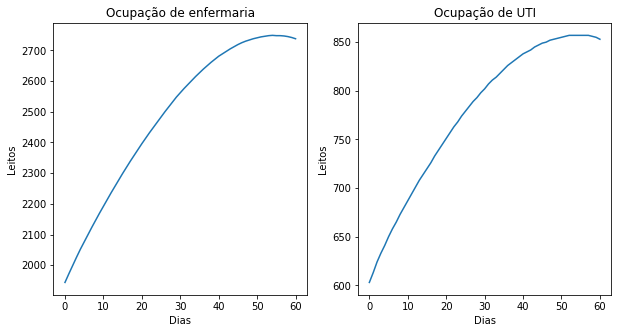

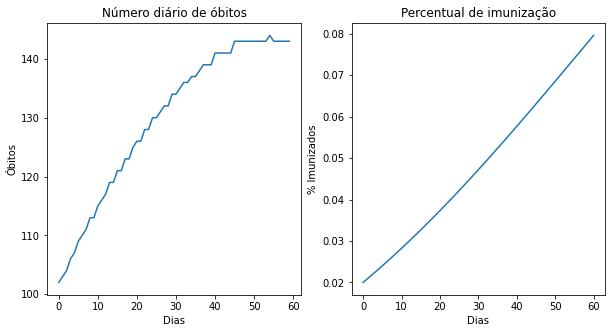

In [5]:
from matplotlib import pyplot as plt

#Estimativas gerais relativos à COVID-19
letalidade_geral = 0.01    # estimativa fonte: https://www.nature.com/articles/d41586-020-01738-2
tempo_reproducao = 5    # intervalo geracional (tempo para R0) fonte:https://www.eurosurveillance.org/content/10.2807/1560-7917.ES.2020.25.17.2000257?crawler=true
tempo_cura_sem_hosp = 7  # período infeccioso para não hospitalizados

#Dados típicos de internação obtidos a partir de análise estatística sobre a base SRAG
tempo_enfermaria_cura = 6
tempo_enfermaria_obito = 5
letalidade_enfermaria = 0.141
tempo_UTI_cura = 5
tempo_UTI_obito = 5
letalidade_UTI = 0.386

# Condições iniciais da simulação com dados relativos ao município de São Paulo em 01/04/2020
populacao_total = 12252000         # estimativa do IBGE
perc_imunizados= []
internados_enfermaria= []
internados_UTI= []
obitos_diarios= []
infectados_nao_hosp = []
perc_imunizados.append(0.02)          # estimativa para obter cerca de 5,2% do teste sorológico realizado em 6/maio com os demais parâmetros do modelo
internados_enfermaria.append(1944)    # obtido após transformação dos dados da base SRAG para internações sem uso de UTI
internados_UTI.append(603)            # obtido após transformação dos dados da base SRAG para internações em UTI
obitos_iniciais = 96                  # número diário obtido a partir da base SRAG conforme data do óbito para casos confirmados, indeterminados e não preenchidos
infectados_nao_hosp.append(obitos_iniciais/letalidade_geral * tempo_cura_sem_hosp - internados_enfermaria[0] - internados_UTI[0])
#print ("Número inicial de infectados que não são hospitalizados: ", infectados_nao_hosp[0])

# Número básico de reprodução (R0) adotado no período
num_reproducao = 1.08             # estimativa ajustada durante a execução do modelo (alta sensibilidade)

infectados_diarios = obitos_iniciais / letalidade_geral
#print ("Infectados diários iniciais:", infectados_diarios)
perc_infectados_enfermaria = internados_enfermaria[0] / (tempo_enfermaria_cura * (1-letalidade_enfermaria) +tempo_enfermaria_obito* letalidade_enfermaria)/infectados_diarios
#print ("Infectados com necessidade de internação em enfermaria:", perc_infectados_enfermaria)
perc_infectados_UTI = internados_UTI[0] / (tempo_UTI_cura * (1-letalidade_UTI) + tempo_UTI_obito* letalidade_UTI)/infectados_diarios
#print ("Infectados com necessidade de internação em UTI:", perc_infectados_UTI)

# Valores iniciais da simulação
dias_simulacao = 60      # número de dias para rodar a simulacao
dia = 0
pop_imunizada = round(perc_imunizados[0]*populacao_total)
pop_saudavel= populacao_total - internados_enfermaria[dia] - internados_UTI[dia] - infectados_nao_hosp [dia]
obitos_acumulados=[]

# Loop diário do modelo
while (dia < dias_simulacao):

  # Fluxos do modelo
  curados_nao_hosp = round(infectados_nao_hosp[dia] / tempo_cura_sem_hosp,0)
  curados_enfermaria = round (internados_enfermaria[dia]/tempo_enfermaria_cura * (1-letalidade_enfermaria),0)
  curados_UTI = round (internados_UTI[dia]/tempo_UTI_cura*(1-letalidade_UTI),0)
  obitos_enfermaria = round (internados_enfermaria[dia]/tempo_enfermaria_obito * letalidade_enfermaria,0)
  obitos_UTI = round (internados_UTI[dia]/tempo_UTI_obito * letalidade_UTI,0)
  curados_diarios = curados_enfermaria + curados_UTI + curados_nao_hosp
  obitos_diarios.append(obitos_enfermaria + obitos_UTI)
  infectados_total = infectados_nao_hosp[dia] + internados_enfermaria[dia] + internados_UTI[dia]
  infectados_diarios = round (((infectados_total)*(num_reproducao*(1-perc_imunizados[dia]))**(1/tempo_reproducao)),0)-(infectados_total) + curados_diarios + obitos_diarios[dia]
  if infectados_diarios <0:
    infectados_diarios = 0
  novos_int_enfermaria = round(infectados_diarios * perc_infectados_enfermaria,0)
  novos_int_UTI= round (infectados_diarios * perc_infectados_UTI,0)
  #print (dia,",",pop_saudavel,",",perc_imunizados[dia],",",pop_imunizada,",",infectados_nao_hosp[dia],",",internados_enfermaria[dia],",",internados_UTI[dia])
  #print (infectados_diarios,",",novos_int_enfermaria,",",novos_int_UTI,",",curados_nao_hosp,",",curados_enfermaria,",",curados_UTI,",",obitos_enfermaria,",",obitos_UTI)
  
  # Estoques do modelo
  dia = dia + 1  
  pop_saudavel = pop_saudavel - infectados_diarios - novos_int_enfermaria - novos_int_UTI + curados_diarios
  pop_imunizada = pop_imunizada + curados_diarios
  infectados_nao_hosp.append(infectados_nao_hosp [dia-1] + infectados_diarios - novos_int_enfermaria - novos_int_UTI - curados_nao_hosp)
  internados_enfermaria.append( internados_enfermaria[dia-1] + novos_int_enfermaria - curados_enfermaria - obitos_enfermaria)
  internados_UTI.append(internados_UTI[dia-1] + novos_int_UTI - curados_UTI - obitos_UTI)
  perc_imunizados.append(pop_imunizada/(pop_saudavel + infectados_nao_hosp[dia]+ internados_enfermaria[dia] + internados_UTI[dia]))

#Plotando os resultados
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (10,5))
ax1.plot(internados_enfermaria)
ax2.plot(internados_UTI)
ax1.set(title="Ocupação de enfermaria", xlabel="Dias", ylabel="Leitos")
ax2.set(title="Ocupação de UTI", xlabel="Dias", ylabel="Leitos")
plt.show

fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (10,5))
ax1.plot(obitos_diarios)
ax2.plot(perc_imunizados)
ax1.set(title="Número diário de óbitos", xlabel="Dias", ylabel="Óbitos")
ax2.set(title="Percentual de imunização", xlabel="Dias", ylabel="% Imunizados")
plt.show

##Resultados e Discussão
Comparando os dados do modelo com os dados reais de óbitos acumulados e ocupação de leitos, temos os seguinte gráficos:
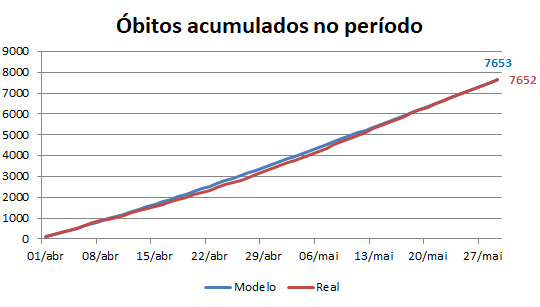

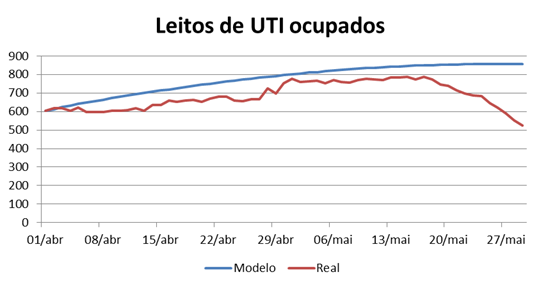

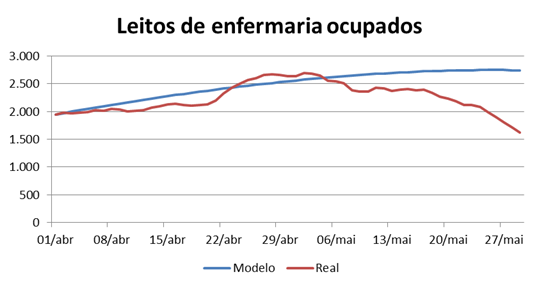



Cabem duas observações com relação aos gráficos de evolução dos leitos: 

*   O cálculo do número real de leitos apresenta números incompletos para os dados das últimas semanas de maio pois os detalhes de internação da base SRAG parecem ser tipicamente atualizados com atraso de algumas semanas
*   É possível observar que a política de internação em enfermaria do município de São Paulo foi alterada nas últimas semanas de abril, passando a hospitalizar mais pacientes com o objetivo de diminuir a quantidade de futuros casos graves que demandariam internação em UTI

### Predições e validação do modelo
A avaliação da utilidade do modelo para fazer predições pode ser diretamente avaliada por meio de comparações com testes sorológicos de prevalência e a evolução do número de óbitos após o período empregado para ajuste do modelo.

*   **Testes sorológicos:** em meados de junho foi realizado novo teste sorológico no município de São Paulo e foi obtida uma taxa de imunidade de 9,5% da população (fonte: https://agenciabrasil.ebc.com.br/saude/noticia/2020-06/inquerito-aponta-que-95-da-populacao-paulistana-ja-teve-covid-19). O percentual de imunizados calculado pelo modelo para o dia 15 de junho é de 9,6%
*   **Óbitos acumulados**: segundo o boletim epidemiológico do município de São Paulo, o total de óbitos confirmados e suspeitos até o dia 27 de junho era de 12.264 (fonte: https://www.prefeitura.sp.gov.br/cidade/secretarias/upload/saude/20200628_boletim_covid19_diario%20e%20Ind%20Plano%20Sao%20Paulo.pdf). O modelo calcula 11.610 óbitos entre 1º de abril e 27 de junho, que somados aos 704 óbitos que ocorreram antes de 1º de abril conforme a base do SRAG, resultam em 12.314 óbitos simulados.




##Conclusões
O exaustivo trabalho preliminar de entender, transformar e validar os dados disponíveis rendeu bons frutos à qualidade do modelo. A consistência entre as letalidades, perfis de internação e percentuais de imunização com dados secundários obtidos por meio de diferentes fontes de informação nos dá um elevado grau de confiança nos dados empregados, mesmo sabendo que estamos distantes dos "dados oficiais" que são acompanhados pelas autoridades.

O modelo construído apresentou um alto grau de precisão em suas predições da evolução da situação epidêmica do município de São Paulo durante o mês de junho. Adicionalmente o modelo previu que o pico de internações e óbitos ocorreria no final do mês de maio, o que de fato vem se observando durante o mês de junho e que está possibilitando que a capital do estado possa evoluir para estágios menos restritivos de isolamento social.

Entretanto alguns cuidados devem ser tomados na sua utilização para períodos maiores de tempo ou na sua aplicação em outros municípios:
*   Mudanças da política de distanciamento social podem trazer grandes incertezas para o modelo, ao afetar o seu parâmetro R0. Por exemplo, ao alterar o valor de 1,08 para 1,10, o modelo projetaria 14.176 mortes até o dia 27 de junho, muito acima das 12.314 projetadas originalmente e 12.264 notificadas no mesmo período.
*   Melhorias no tratamento, reduzindo o tempo de internação e a letalidade alteram significativamente o número de leitos ocupados e de óbitos. Essa evolução deve ser acompanhada pelo uso de versões atualizadas da planilha SRAG e do deslocamento das janelas de tempo de análise estatística e de simulação.
*   Municípios que recebem muitos pacientes de regiões vizinhas ou municípios que enviam seus pacientes para tratamento em outras regiões não se aplicam diretamente ao modelo como foi desenvolvido.

##Trabalhos Futuros
A partir do desenvolvimento realizado neste projeto, novas linhas podem ser seguidas de análises e de modelagem, como por exemplo:
*   Avaliação dos casos de óbitos suspeitos em comparação com casos confirmados de COVID-19 com base nas variáveis da base SRAG para avaliação de que se tratam da mesma doença
*   Apesar dos bons resultados apresentados, o modelo empregado é extremamente simples e não considera o tempo inicial de incubação da doença nem os descompassos temporais entre os seus estágios. Uma futura evolução pode tratar desses aspectos.

